# Reprocess Building  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 2nd  2021
- creation update : April 2nd 2021
- version v0

# Imports

In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [82]:
from iminuit import Minuit
import iminuit

In [83]:
iminuit.__version__

'2.2.0'

In [84]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [85]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [86]:
filename_logbook='logbooks/auxtellogbook_2021_v1.2.csv'

In [87]:
df=pd.read_csv(filename_logbook)

In [88]:
pd.set_option('display.max_rows', None)

In [89]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,...,10.3,51.0,9.3,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,...,10.4,45.0,9.9,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,...,8.8,53.0,7.3,750.0,2700.0,NaN,NaN,,1.0,1.0
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,...,8.8,54.0,6.3,750.0,2700.0,NaN,NaN,,1.0,1.0
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,...,8.8,55.0,7.7,750.0,2700.0,NaN,NaN,,1.0,1.0
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,...,8.7,55.0,6.7,700.0,1700.0,NaN,NaN,,1.0,1.0


# Selection of input file

In [90]:
index_sel=2 # SELECTION

In [91]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [92]:
filename_image=df["file"][index_sel]

In [93]:
file_target(filename_image)

['NGC4755']

In [94]:
xpos=df["Obj-posXpix"][index_sel]
ypos=df["Obj-posYpix"][index_sel]

In [95]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs_reprocess/"
guess = [xpos,ypos]
disperser_label = df["disperser"][index_sel]
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [96]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [97]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [98]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [99]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

2021-04-02 12:07:43  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_NGC4755_2021-02-17_350.fits...


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-02 12:07:43  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-02 12:07:43  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-02 12:07:43  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-04-02 12:07:43  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-02 12:07:48  Star       load                 INFO   
	Simbad:
 MAIN_ID     RA      DEC    RA_PREC ... PM_ERR_MINA_4 PM_ERR_ANGLE_4 Z_VALUE_4 
          "h:m:s"  "d:m:s"          ...    mas / yr        deg                 
--------- -------- -------- ------- ... ------------- -------------- ----------
NGC  4755 12 53 39 -60 21.7       4 ...         0.134             90 -0.0000670
2021-04-02 12:07:48  Star       load_spectra         DEBUG  
	Target label: NGC4

## Show relevant parameters

In [100]:
parameters.OBS_NAME

'AUXTEL'

In [101]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [102]:
parameters.DISTANCE2CCD

174.9980010986328

In [103]:
parameters.LAMBDA_MIN 

300

In [104]:
parameters.LAMBDA_MAX 

1100

In [105]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_reprocess"

In [106]:
image.filter_label

''

In [107]:
image.header["FILTER"]

'empty_1'

# Plot image and find the target position

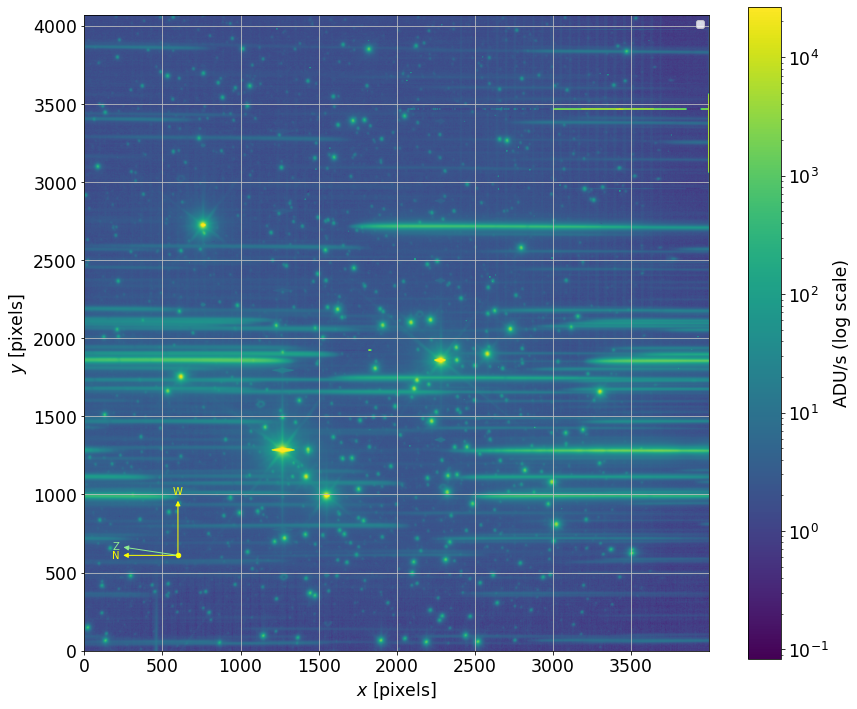

In [112]:
image.plot_image(figsize=(14, 12),scale="log")

# Find target

2021-04-02 12:07:54  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                c0_1       
    ------------------ ------------------- -------------------
    6.6408009260257925 0.01659471833470085 0.04082495651098077
2021-04-02 12:07:55  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


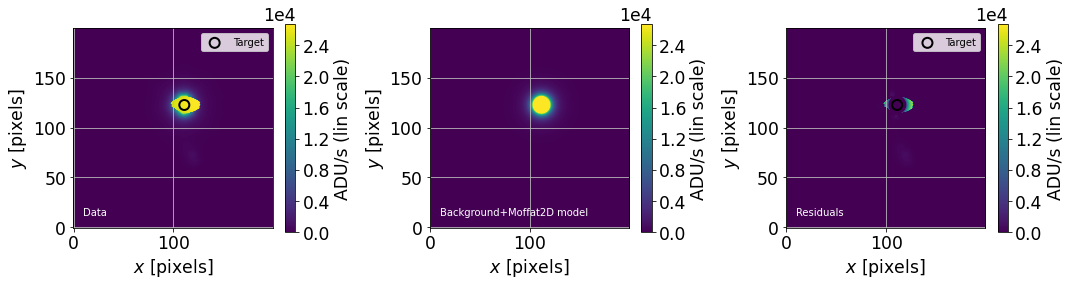

2021-04-02 12:07:57  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


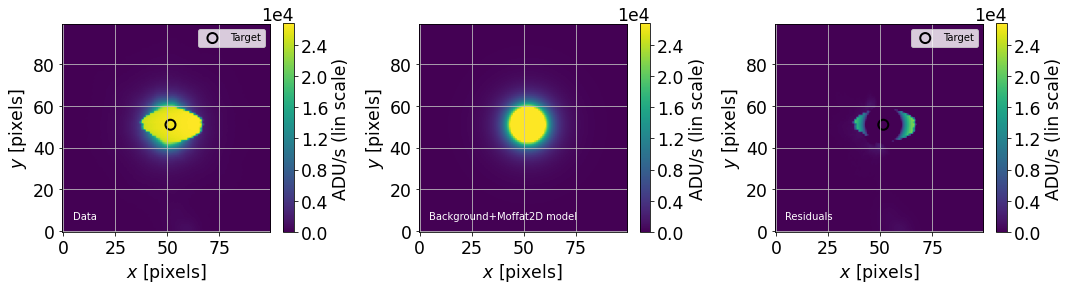

2021-04-02 12:07:58  Image      find_target          INFO   
	X,Y target position in pixels: 761.527,2722.937


In [109]:
parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [110]:
print(x1,y1)

761.5273396773811 2722.9372398307983


# Go for spectrum reconstruction

2021-04-02 12:07:58  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-04-02 12:07:58  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_NGC4755_2021-02-17_350.fits...
2021-04-02 12:07:58  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-02 12:07:58  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-02 12:07:58  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-04-02 12:07:58  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-02 12:08:02  Star       load                 INFO   
	Simbad:
 MAIN_ID     RA      DEC    RA_PREC ... PM_ERR_MINA_5 PM_ERR_ANGLE_5 Z_VALUE_5 
          "h:m:s"  "d:m:s"          ...    mas / yr        deg                 
--------- -------- -------- ------- ... ------------- -------------- ----------
NGC  4755 12 53 39 -60 21.7       4 ...         0.134             90 -0.0000670
2021-04-02 12:08:02  Star       load_spectra         DEBUG  
	Target label: NGC4755
	Calspec? False
	Number of spectra: 0
	Redshift: --
	Emission spectrum 

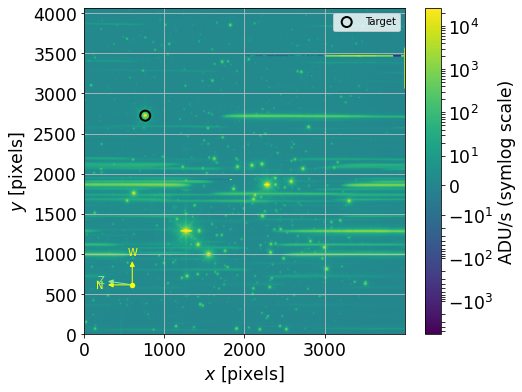

2021-04-02 12:08:06  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 761.52733968 2722.93723983]...
2021-04-02 12:08:06  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_NGC4755_2021-02-17_350_wcs/Cor_holo4_003_NGC4755_2021-02-17_350.wcs available, use 2D fit to find target pixel position.
2021-04-02 12:08:07  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                 c1_0                  c0_1        
    ------------------ --------------------- ---------------------
    12.955378574886398 -0.004765156977616993 -0.002222752077381622
2021-04-02 12:08:07  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 12 iterations because the relative change of cost is below ftol=1.25e-05.


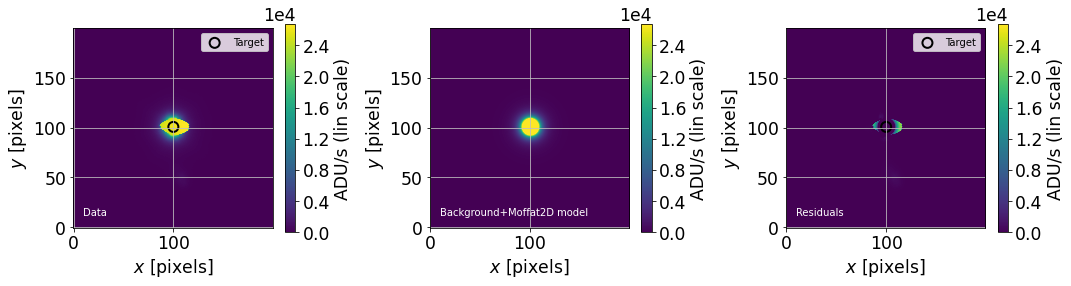

2021-04-02 12:08:08  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


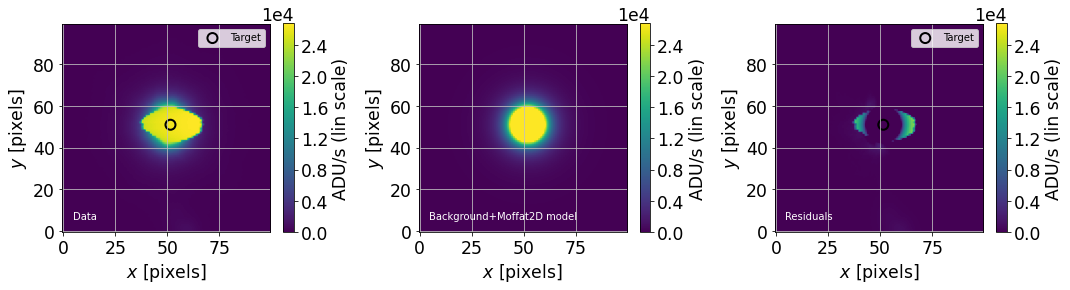

2021-04-02 12:08:09  Image      find_target          INFO   
	X,Y target position in pixels: 761.525,2722.936


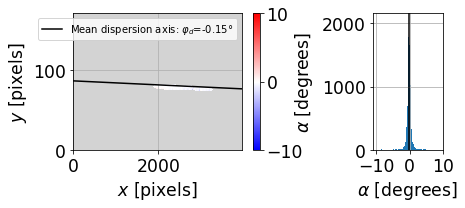

2021-04-02 12:08:10  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.15 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


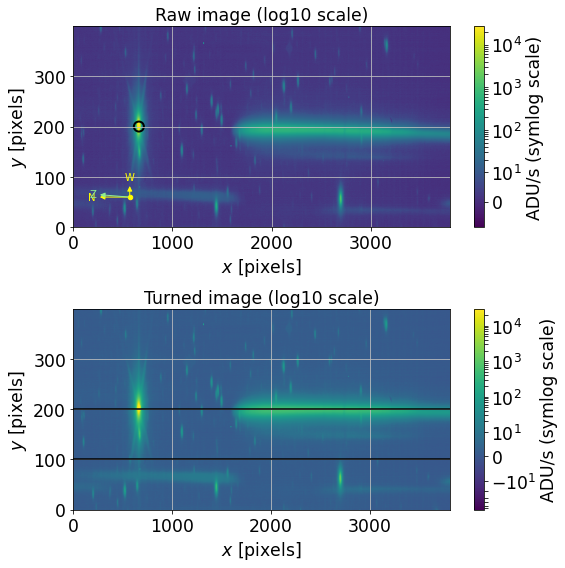

2021-04-02 12:08:21  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-02 12:08:21  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
          c0_0               c1_0                c0_1        
    ---------------- ------------------- --------------------
    92.2714794146264 0.13973833061814386 -0.12979615270378053
2021-04-02 12:08:21  Image      find_target_init     DEBUG  
	4 saturated pixels: set saturation level to 28333.333333333332 ADU/s.
2021-04-02 12:08:21  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 8 iterations because the relative change of cost is below ftol=5e-05.


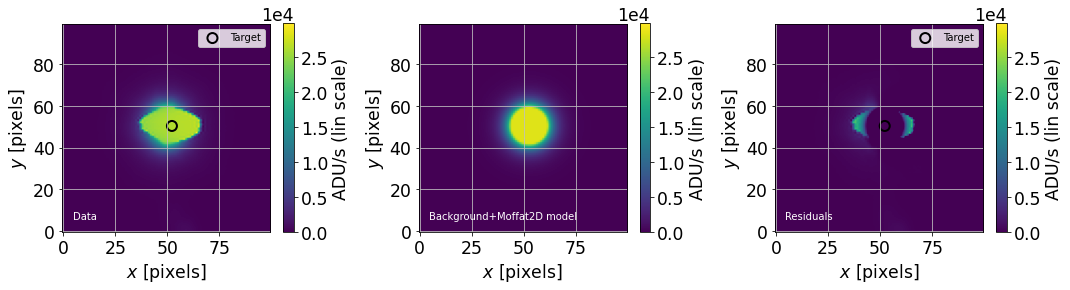

2021-04-02 12:08:22  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 6 iterations because the relative change of cost is below ftol=0.0002.


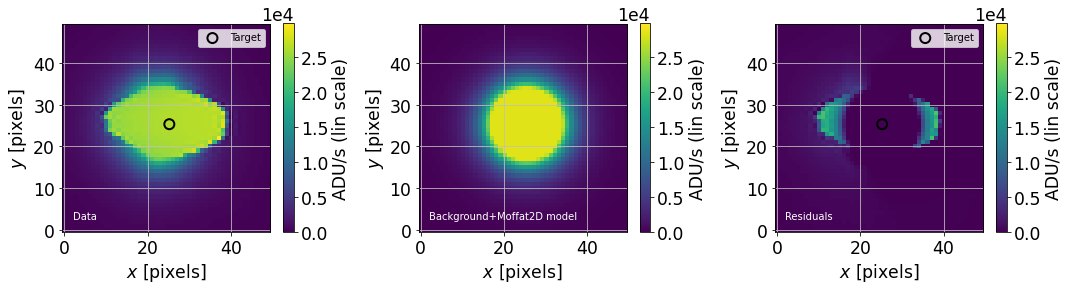

2021-04-02 12:08:23  Image      find_target          INFO   
	X,Y target position in pixels: 766.235,2724.352
2021-04-02 12:08:23  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-02 12:08:23  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-02 12:08:23  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1586:3814,2544:2904] (size (2228, 360))


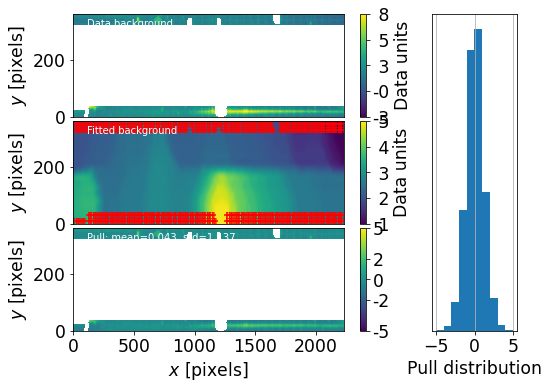

2021-04-02 12:08:27  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/chromaticpsf.py:764: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax[0].set_yscale('symlog', linthresh=10)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/dagoret/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a mask

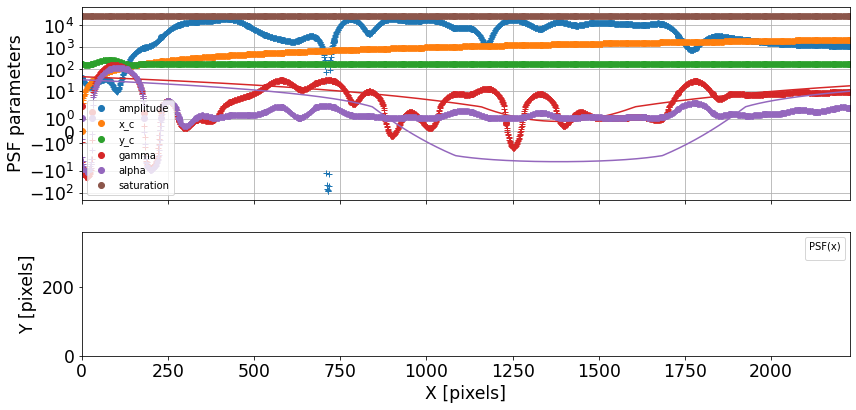

2021-04-02 12:09:02  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.7838e+07 initial chisq_red=312.37
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [-0.08177366  0.00081524  0.04706434 -0.22213221 -0.0466895  -0.0736436
 -0.51616444 -0.16228198 -0.27758531]
	New parameters: [-2.13317917  0.92653216 -0.07717403  1.68842245 -1.39190056 -0.97944975
  0.67395721 -0.19631197 -0.24255795]
	Final cost=2.7421e+07 final chisq_red=307.69 computed in 2.92s
2021-04-02 12:09:03  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_0 has a null Jacobian; parameter is fixed at its last known current value (0.6739572061468514).
2021-04-02 12:09:04  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (-0.19631196718854405).
2021-04-02 12:09:04  spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_2 has a null Jacobian; parameter

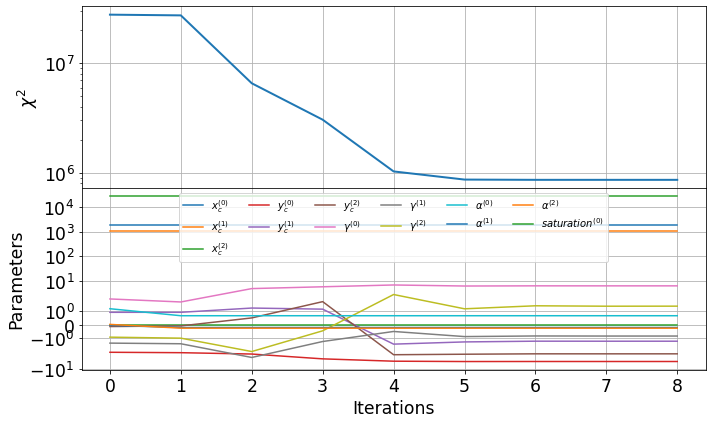

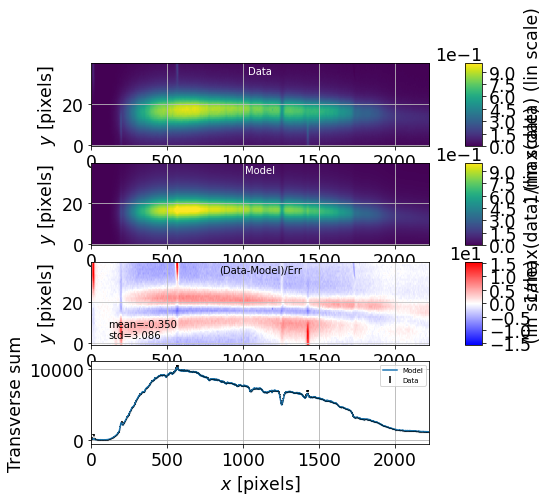

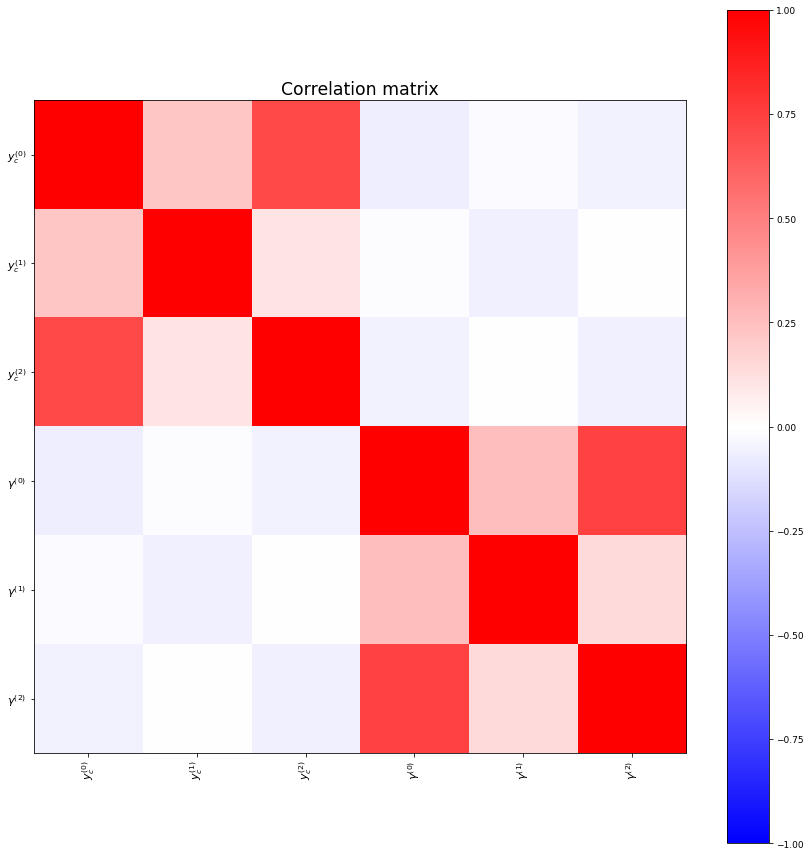

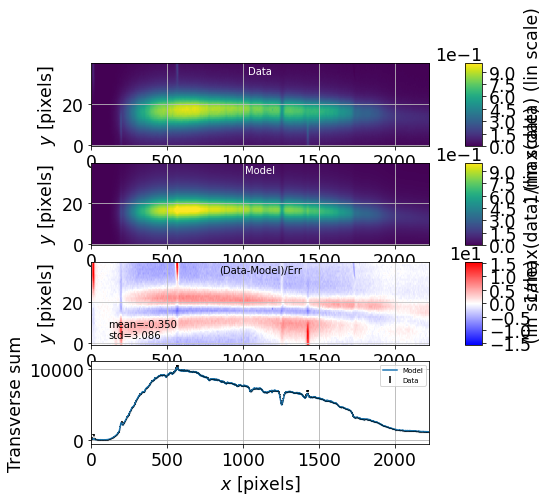

2021-04-02 12:09:25  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
    amplitude       x_c   ...          Dy         Dy_disp_axis
------------------ ------ ... ------------------- ------------
 38.68414750677982    0.0 ...   -6.06771194571877          0.0
43.263405581377114    1.0 ...  -6.062396295038411          0.0
 49.43952627087959    2.0 ... -6.0570863921153375          0.0
 58.14275696910583    3.0 ... -6.0517822369495775          0.0
  50.6726429198423    4.0 ...  -6.046483829541103          0.0
 52.87247640045188    5.0 ...  -6.041191169889913          0.0
 91.35490955805278    6.0 ...  -6.035904257996037          0.0
 89.91243482047908    7.0 ...  -6.030623093859447          0.0
100.52670312950697    8.0 ...  -6.025347677480141          0.0
104.17986123218871    9.0 ...  -6.020078008858121          0.0
               ...    ... ...                 ...          ...
1369.6641604731317 2217.0 ...  -8.401912323594075  

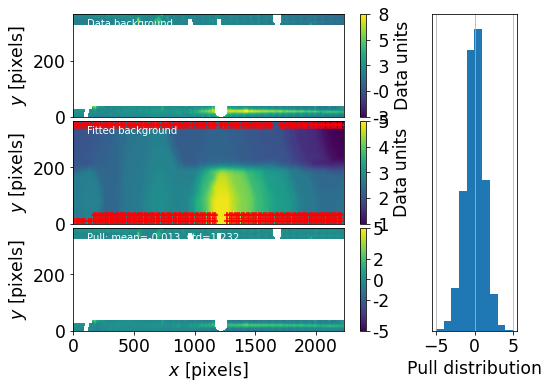

2021-04-02 12:09:30  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=2.468 ADU/s, RMS=1.682 ADU/s.
2021-04-02 12:09:30  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1580:3808,2535:2901] (size (2228, 366))
	New target position in spectrogram frame: [-818.4750449778434, 187.935958043965]


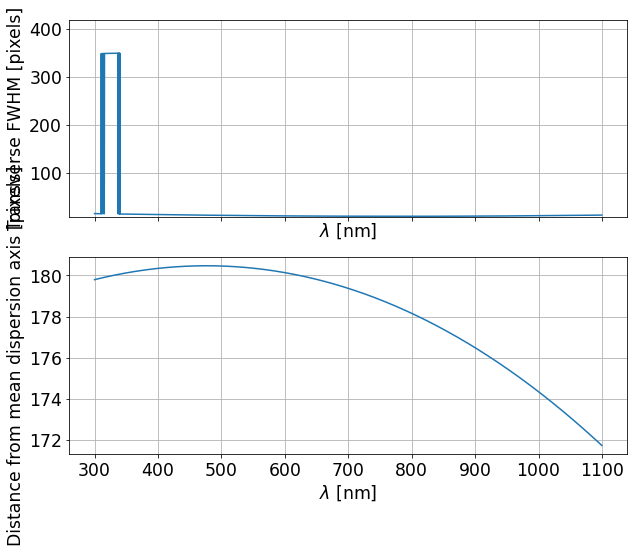

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


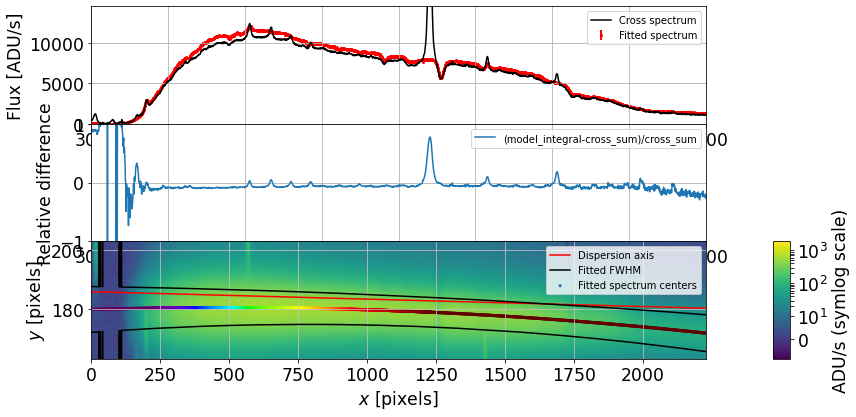

2021-04-02 12:09:33  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


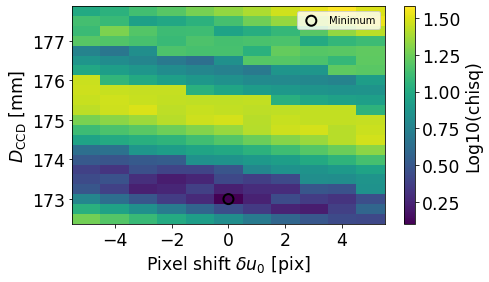

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [172.9980011   0.       ]


2021-04-02 12:10:24  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: 0.033pix
	D = 173.004 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -4.0 sigma shift)
2021-04-02 12:10:24  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-02 12:10:24  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_reprocess/Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits
2021-04-02 12:10:25  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_reprocess/Cor_holo4_003_NGC4755_2021-02-17_350_spectrogram.fits


   Line   Tabulated  Detected   Shift    ...   Chisq    Eqwidth_mod Eqwidth_data
              nm        nm        nm     ...  reduced        nm          nm     
--------- --------- --------- ---------- ... ---------- ----------- ------------
 $He_{I}$     388.8 392.97034    4.17034 ...  26.494919   -0.367006   -1.5630558
$H\delta$     410.2 403.97046 -6.2295547 ...  26.494919  -2.3792784  0.115065016
$H\gamma$     434.0 428.90558 -5.0944266 ...   2.040997 -0.08270808   -0.1265132
 $He_{I}$     447.1 450.66266   3.562649 ...   2.040997  -0.5848341   -2.1209323
$Fe_{II}$     463.8  461.3173 -2.4826996 ...   2.040997  -0.7346261   -1.9955596
$He_{II}$     468.6  472.5381  3.9380815 ...   2.040997  -0.5966784   -1.8559916
 $H\beta$     486.3 480.56833  -5.731662 ...   2.040997 -0.10243744  -0.48559856
$Fe_{II}$     515.8 512.48267  -3.317321 ...   2.040997   -0.530368   -0.7786887
$Fe_{II}$     527.3 523.75903 -3.5409381 ...   2.040997 -0.19011569  -0.75696003
$C_{III}$     570.0 576.2740

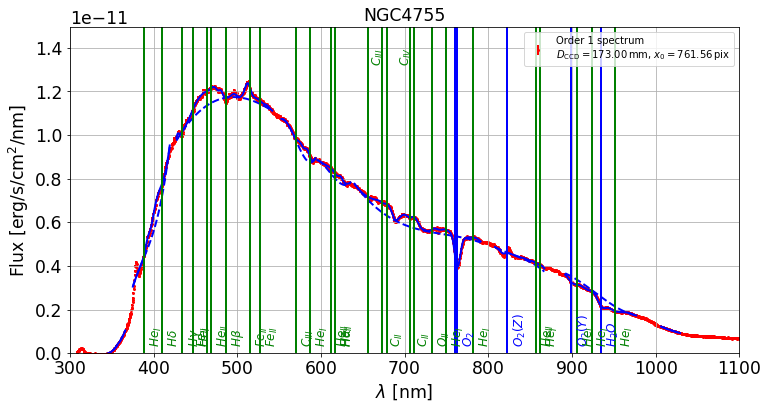

In [111]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)